In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=2)
from sklearn.model_selection import train_test_split

X = pd.read_csv('/content/X_opening.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [ ]:
model.fit(X_train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

treedot = export_graphviz(model,out_file=None, feature_names=X.columns)
treedot

'digraph Tree {\nnode [shape=box] ;\n0 [label="opening_gross <= 41613376.0\\nmse = 4.491994363696598e+16\\nsamples = 1665\\nvalue = 141540319.054"] ;\n1 [label="opening_gross <= 22074047.0\\nmse = 1.3333822193127824e+16\\nsamples = 1506\\nvalue = 92999937.199"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="mse = 4923666241203546.0\\nsamples = 1257\\nvalue = 64781848.271"] ;\n1 -> 2 ;\n3 [label="mse = 3.147813101998764e+16\\nsamples = 249\\nvalue = 235450289.735"] ;\n1 -> 3 ;\n4 [label="opening_gross <= 70351576.0\\nmse = 1.10398118715936e+17\\nsamples = 159\\nvalue = 601300162.289"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="mse = 4.067538845924512e+16\\nsamples = 92\\nvalue = 440868287.554"] ;\n4 -> 5 ;\n6 [label="mse = 1.2226485798747546e+17\\nsamples = 67\\nvalue = 821594676.851"] ;\n4 -> 6 ;\n}'

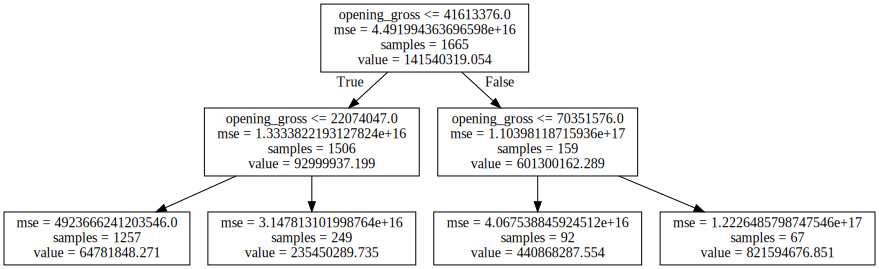

In [ ]:
graphviz.Source(treedot)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

forest = RandomForestRegressor(200)
results = cross_validate(forest,X,y,cv=5,scoring='r2',return_train_score=True)

In [ ]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.9654083654965737
0.5248620400577225


Gradient boosted trees

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

ensemble = GradientBoostingRegressor()
results = cross_validate(ensemble,X,y,cv=5, scoring='r2', return_train_score=True)

In [ ]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.9151392143549633
0.5278731855696092


## Optimizacion de hiperparametros

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

mide todos los scores de manera cruzada

In [ ]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators': range(20,501,20)}

In [ ]:
list(param_test1['n_estimators'])

[20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380,
 400,
 420,
 440,
 460,
 480,
 500]

In [ ]:
estimator = GradientBoostingRegressor(learning_rate=0.1,
                                      min_samples_split=500,
                                      min_samples_leaf=50,
                                      max_depth=8,
                                      max_features='sqrt',
                                      subsample=0.8,
                                      random_state=10)

In [ ]:
gsearch1 = GridSearchCV(estimator,
                        param_grid = param_test1,
                        scoring = 'r2',
                        cv=5)


In [ ]:
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=8,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
            

In [ ]:
list(zip(gsearch1.cv_results_['mean_test_score'], gsearch1.cv_results_['std_test_score'],
         gsearch1.cv_results_['params'])), gsearch1.best_params_, gsearch1.best_score_

([(0.6553377167287445, 0.05763723230388878, {'n_estimators': 20}),
  (0.7194707183052496, 0.06255974658122894, {'n_estimators': 40}),
  (0.7347239263041044, 0.06359927761595936, {'n_estimators': 60}),
  (0.7389339055742862, 0.062364772765764416, {'n_estimators': 80}),
  (0.7420485206288181, 0.06271425977283825, {'n_estimators': 100}),
  (0.7459322395926498, 0.06235500960463639, {'n_estimators': 120}),
  (0.7495406754127887, 0.06335029572288611, {'n_estimators': 140}),
  (0.7508197586274827, 0.06304688375599073, {'n_estimators': 160}),
  (0.7525654539309128, 0.0634404813604329, {'n_estimators': 180}),
  (0.753490598609423, 0.06446653281824145, {'n_estimators': 200}),
  (0.7545692717605135, 0.06341510679393178, {'n_estimators': 220}),
  (0.7553059694284988, 0.06488882352873111, {'n_estimators': 240}),
  (0.755171486028867, 0.06572082397934954, {'n_estimators': 260}),
  (0.753885223323653, 0.06495415209551623, {'n_estimators': 280}),
  (0.7546023133872947, 0.06568746888772702, {'n_estimat

In [ ]:
final_results = cross_validate(gsearch1.best_estimator_,X_train,y_train, return_train_score=True)

In [ ]:
test_scores = final_results['test_score']
train_scores = final_results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.8286608694466742
0.7553059694284988


In [ ]:
gsearch1.best_estimator_

In [ ]:
estimator = GradientBoostingRegressor(learning_rate=0.1,
                                      min_samples_split=500,
                                      min_samples_leaf=50,
                                      max_depth=8,
                                      max_features='sqrt',
                                      subsample=0.8,
                                      random_state=240)

In [ ]:
estimator

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=500,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=240, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
estimator.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=500,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=240, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
estimator.score(X_test,y_test)

0.8112351998020706

Pasamos de 0.44 a 0.81